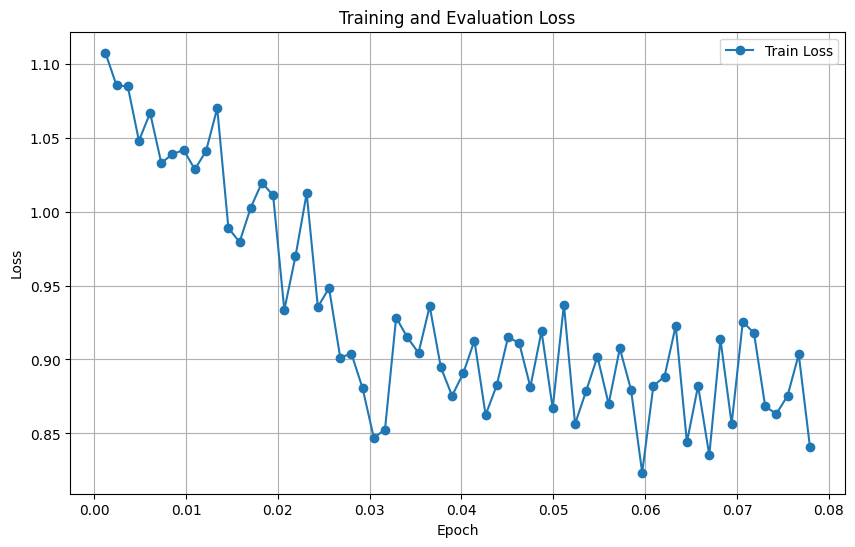

In [ ]:
import re
import matplotlib.pyplot as plt

file_path = '/home/zhuyao/Sunpeng/llava_qwen/check_point/instruct_525k/log.txt'

epochs = []
train_losses = []
eval_losses = []


with open(file_path, 'r') as file:
    for line in file:
        train_match = re.search(r'Epoch ([0-9]+\.[0-9]+).*?Loss: ([0-9.]+)', line)
        if train_match:
            epochs.append(float(train_match.group(1)))
            train_losses.append(float(train_match.group(2)))
        eval_match = re.search(r'Eval_Loss: ([0-9.]+)', line)
        if eval_match:
            eval_losses.append(float(eval_match.group(1)))


plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
if eval_losses:
    eval_epochs = list(range(1, len(eval_losses) + 1))
    plt.plot(eval_epochs, eval_losses, label='Eval Loss', marker='x', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Evaluation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
new_list = []
new_epochs = []

chunk_size = 5

for i in range(0, len(train_losses), chunk_size):
    chunk = train_losses[i:i+chunk_size]
    avg_loss = sum(chunk) / len(chunk)  
    new_list.append(avg_loss)

    if len(chunk) == chunk_size:
        new_epochs.append(epochs[i + chunk_size - 1])
    else:
        new_epochs.append(epochs[i + len(chunk) - 1])  



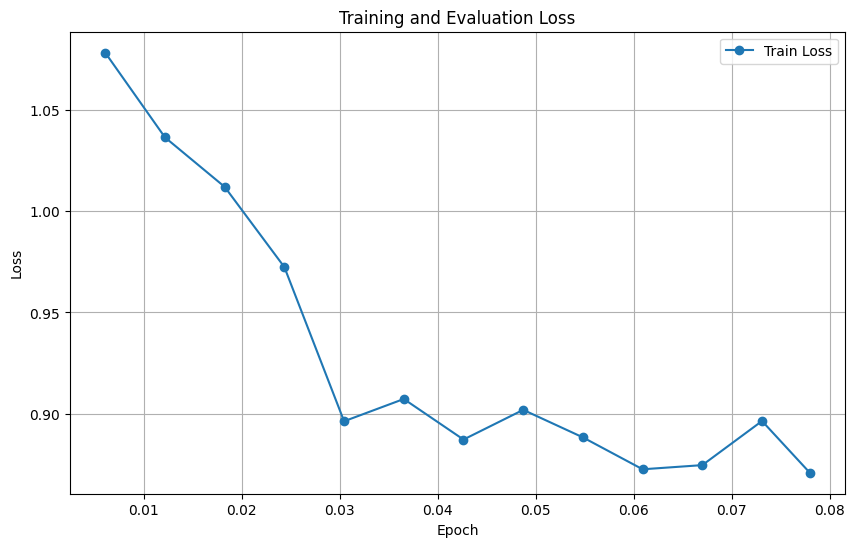

In [40]:



plt.figure(figsize=(10, 6))
plt.plot(new_epochs, new_list, label='Train Loss', marker='o')
if eval_losses:
    eval_epochs = list(range(1, len(eval_losses) + 1))
    plt.plot(eval_epochs, eval_losses, label='Eval Loss', marker='x', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Evaluation Loss')
plt.legend()
plt.grid(True)
plt.show()
